# **• DOMAIN:Banking and finance**

#### Business Objective 
Bank XYZ has a growing customer base where the majority of them are liability customers (depositors) vs. borrowers (asset customers). The bank is interested in expanding the borrower’s base rapidly to bring in more business via loan interests.
A campaign that the bank ran in the last quarter showed an average single-digit conversion rate. In the last town hall, the marketing head mentioned that digital transformation being the core strength of the business strategy, how to devise effective campaigns with better target marketing to increase the conversion ratio to double-digit with same budget as per the last campaign. 
As a data scientist, you are asked to develop a machine learning model to identify potential borrowers to support focused marketing.
Data Description
The dataset has 2 CSV files, 
•	Data1 - 5000 rows and 8 columns
•	Data 2 - 5000 rows and 7 columns
The data consists of the following attributes:
1. ID: Customer ID
2. Age Customer’s approximate age.
3. Customer Since: Customer of the bank since. 
4. Maximum Spend: Customer’s highest spend so far in one transaction. 
5. Pin Code: Customer’s zip code.
6. Hidden Score: A score associated to the customer which is masked by the bank as an IP.
7. Average Spend Monthly: Customer’s monthly average spend so far. 
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. 
10. Security: Customer’s security asset with the bank. 
11. FD Account: Customer’s fixed deposit account with the bank. 
12. Online Banking: if the customer uses internet banking.
13. Credit Card: if the customer uses bank’s credit card.
14. Loan On Card: if the customer has a loan on credit card

### Aim
#### Build a machine learning model to perform focused digital marketing by predicting the potential customers who will convert from liability customers to asset customers.


# Importing Necessary Packages

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

# 1. Import and warehouse data:

**Dataset 1**

In [2]:
df1=pd.read_excel('Data1.xlsx')

**Checking First 5 Rows**

In [3]:
df1.head()

,ID,Age,CustomerSince,MaximumSpend,Pincode,HiddenScore,AverageSpendMonthly,Level
0,1,28,1,49,91107,4,2.6,1
1,2,41,19,34,90089,3,2.5,1
2,3,39,15,11,94720,1,2.0,1
3,4,35,9,100,94112,1,4.7,2
4,5,38,8,45,91330,4,3.0,2


**Shape of the dataset**

In [4]:
df1.shape

(5000, 8)

In [5]:
df1.head() #checking sample 5 records

,ID,Age,CustomerSince,MaximumSpend,Pincode,HiddenScore,AverageSpendMonthly,Level
0,1,28,1,49,91107,4,2.6,1
1,2,41,19,34,90089,3,2.5,1
2,3,39,15,11,94720,1,2.0,1
3,4,35,9,100,94112,1,4.7,2
4,5,38,8,45,91330,4,3.0,2


**We have 8 columns and 5000 rows**

**Dataset-2**

In [6]:
df2=pd.read_csv('Data2.csv')

**Shape of the dataset**

In [7]:
df2.shape

(5000, 7)

**We have 7 columns and 5000 rows**

In [97]:
df2.tail() #checking first 5 records

,ID,Mortgage,Security,FDAccount,OnlineBanking,CreditCard,LoanOnCard
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0
4999,5000,0,0,0,1,1,0.0


# Merging the dataset

In [9]:
df=df1.merge(df2,left_on='ID',right_on='ID') #id is common in both dataframe

In [10]:
df.shape

(5000, 14)

**Final Dataframe has 14 columns and 5000 rows**

In [11]:
df.head()

,ID,Age,CustomerSince,MaximumSpend,Pincode,HiddenScore,AverageSpendMonthly,Level,Mortgage,Security,FDAccount,OnlineBanking,CreditCard,LoanOnCard
0,1,28,1,49,91107,4,2.6,1,0,1,0,0,0,NaN
1,2,41,19,34,90089,3,2.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,2.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,4.7,2,0,0,0,0,0,NaN
4,5,38,8,45,91330,4,3.0,2,0,0,0,0,1,NaN


# 2. Data Cleansing

**Checking the datatypes**

In [12]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
MaximumSpend             int64
Pincode                  int64
HiddenScore              int64
AverageSpendMonthly    float64
Level                    int64
Mortgage                 int64
Security                 int64
FDAccount                int64
OnlineBanking            int64
CreditCard               int64
LoanOnCard             float64
dtype: object

**Changing datatypes of categorical features**

In [13]:
col=['HiddenScore','Level','Security','FDAccount', 'OnlineBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    df[i]=df[i].astype('category')

In [14]:
df.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
MaximumSpend              int64
Pincode                   int64
HiddenScore            category
AverageSpendMonthly     float64
Level                  category
Mortgage                  int64
Security               category
FDAccount              category
OnlineBanking          category
CreditCard             category
LoanOnCard             category
dtype: object

**We can see all categorical columns datatypes are changed**

**Checking the information about dataset**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   MaximumSpend         5000 non-null   int64   
 4   Pincode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   AverageSpendMonthly  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FDAccount            5000 non-null   category
 11  OnlineBanking        5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.6 KB


**Target variable Loanoncard having few missing records**

In [16]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
MaximumSpend            0
Pincode                 0
HiddenScore             0
AverageSpendMonthly     0
Level                   0
Mortgage                0
Security                0
FDAccount               0
OnlineBanking           0
CreditCard              0
LoanOnCard             20
dtype: int64

**We have very less missing value so we will drop the missing records.**

In [17]:
df.dropna(axis=0,inplace=True)

In [18]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
MaximumSpend           0
Pincode                0
HiddenScore            0
AverageSpendMonthly    0
Level                  0
Mortgage               0
Security               0
FDAccount              0
OnlineBanking          0
CreditCard             0
LoanOnCard             0
dtype: int64

**All the missing records are dropped**

**Id column is not useful in model building so dropping that feature**

In [19]:
df.drop('ID',axis=1,inplace=True)

# 3.Data Analysis & Visulaization

**5 Point summary**

In [20]:
df.describe()

,Age,CustomerSince,MaximumSpend,Pincode,AverageSpendMonthly,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,45.364659,20.117671,73.85241,93152.420482,3.820460,56.589759
std,11.794431,11.468716,46.07009,2123.660073,1.834517,101.836758
min,19.000000,-3.000000,8.00000,9307.000000,1.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,2.600000,0.000000
50%,46.000000,20.000000,64.00000,93407.000000,3.600000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,4.700000,101.000000
max,71.000000,43.000000,224.00000,96651.000000,13.000000,635.000000


**Mean and Median of Age,customer since column is nearly equal,So there wont be any skewness**

**Mean is greater than Median in highestspend and monthly average spend.So Positive skewness will exist**

**We can see high fluctuation in mortage column. 50% of data has zero values but maximum value is 635. This is hugely affected by outliers**

# Univariate Analysis

**Distribution and outlier analysis of numerical variables**

**Age**

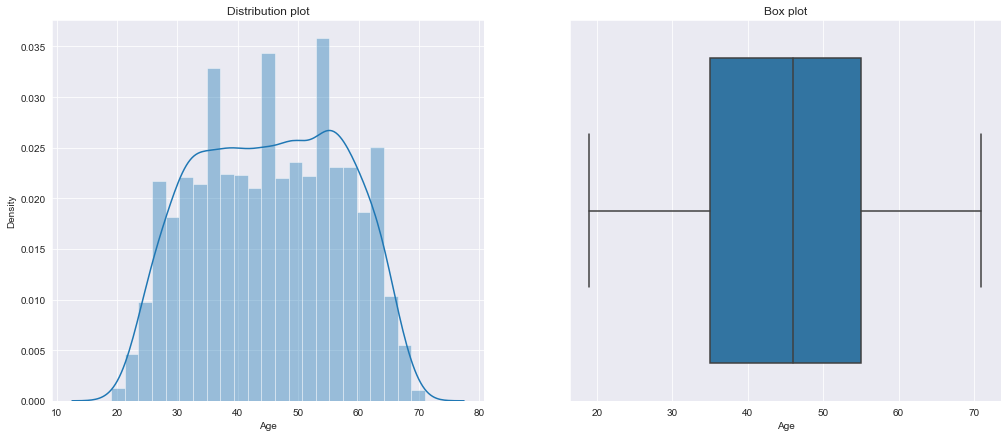

 Total Number of outliers in Age: 0


In [21]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Age', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['Age'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Age'],25),np.percentile(df['Age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Age'] if i < lower or i > upper]
print('{} Total Number of outliers in Age: {}'.format('\033[1m',len(Outliers)))

> **There is normality maintained in age column. Center area is little wider.**

> **People with age between 35 to 65 are more**

> **We have no outliers in this column**

**CustomerSince**

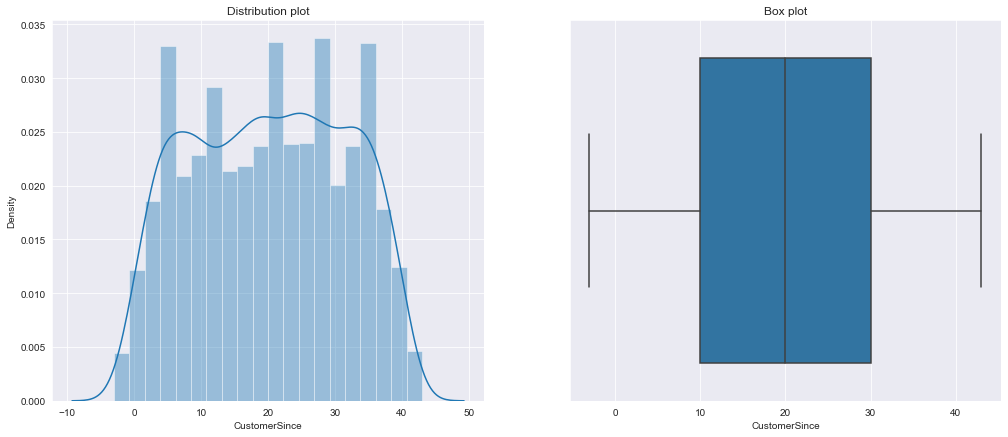

 Total Number of outliers in CustomerSince: 0


In [22]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'CustomerSince', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['CustomerSince'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['CustomerSince'],25),np.percentile(df['CustomerSince'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['CustomerSince'] if i < lower or i > upper]
print('{} Total Number of outliers in CustomerSince: {}'.format('\033[1m',len(Outliers)))

> **Most of the people became customer of bank between 10 to 30. Here the units are masked**

>**We have no outliers**

**MaximumSpend**

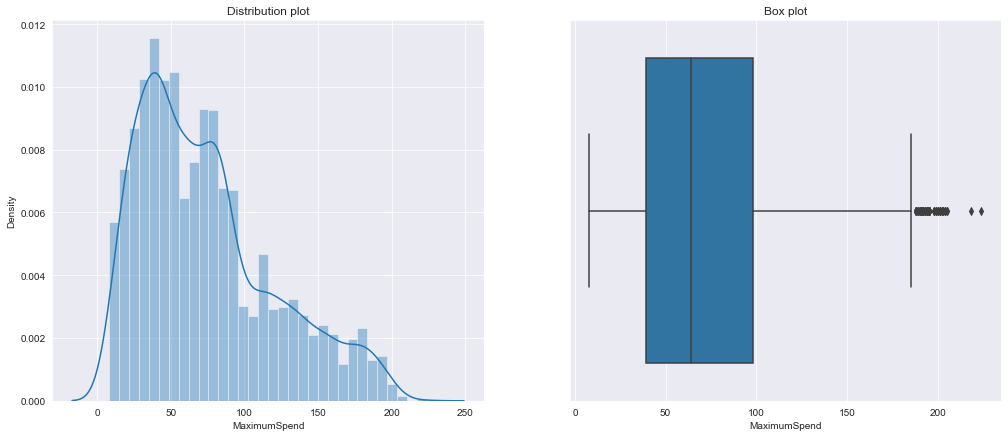

 Total Number of outliers in MaximumSpend: 96


In [23]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'MaximumSpend', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['MaximumSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['MaximumSpend'],25),np.percentile(df['MaximumSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['MaximumSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in MaximumSpend: {}'.format('\033[1m',len(Outliers)))

>**We can see positive skewness in the data**

> **In one transaction highest spend amount is between 45 to 100. Here the units are masked**

>**We can see 96 Outliers. Few customers spent more than 200 as well**

**AverageSpendMonthly**

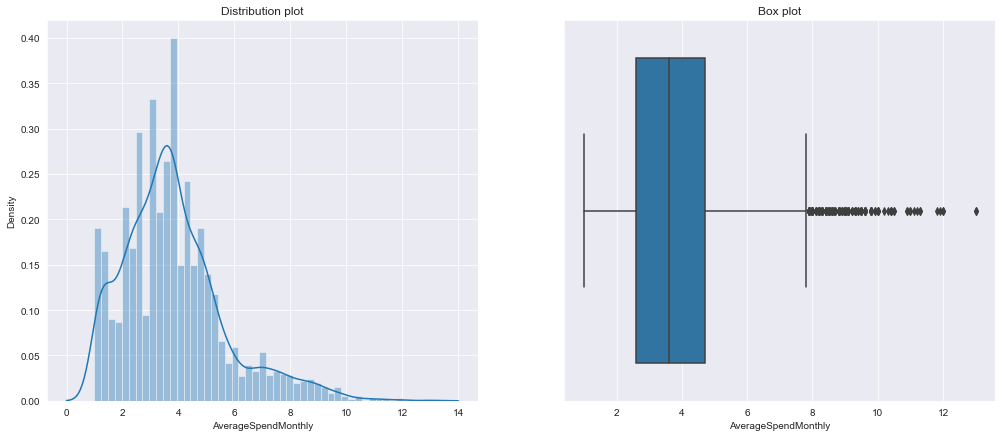

 Total Number of outliers in AverageSpendMonthly: 214


In [24]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'AverageSpendMonthly', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['AverageSpendMonthly'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['AverageSpendMonthly'],25),np.percentile(df['AverageSpendMonthly'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['AverageSpendMonthly'] if i < lower or i > upper]
print('{} Total Number of outliers in AverageSpendMonthly: {}'.format('\033[1m',len(Outliers)))

> **We can see huge positive skewness in the data**

> **Monthly average spend of the customer are mostly between 1 to 3(Units are masked)**

> **There is more number of outliers.This tells some customers spent huge amount as well**

**Pincode**

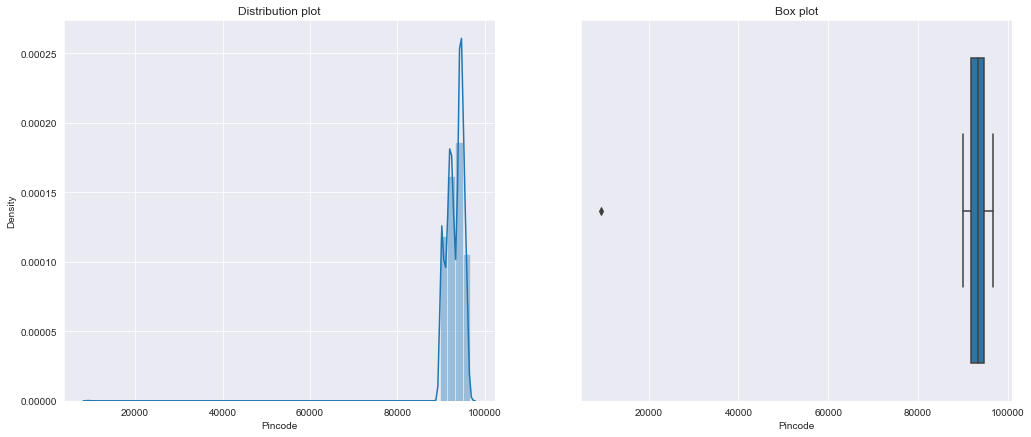

 Total Number of outliers in Pincode: 1


In [25]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Pincode', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['Pincode'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Pincode'],25),np.percentile(df['Pincode'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Pincode'] if i < lower or i > upper]
print('{} Total Number of outliers in Pincode: {}'.format('\033[1m',len(Outliers)))

> **Most of the zipcodes are appeared once.**

> **There is no proper distribution**

> **This column does not add value to the model. We will drop during model building**

**Mortgage** 

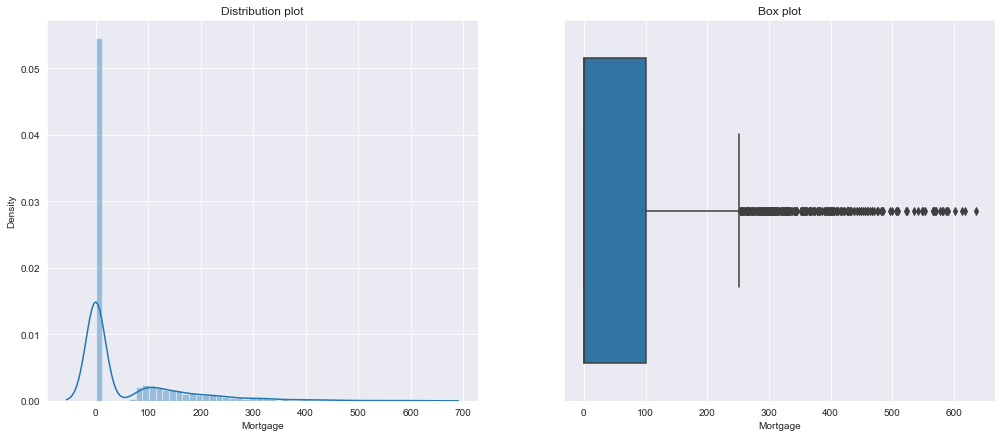

 Total Number of outliers in Mortgage: 291


In [26]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Mortgage', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['Mortgage'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['Mortgage'],25),np.percentile(df['Mortgage'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['Mortgage'] if i < lower or i > upper]
print('{} Total Number of outliers in Mortgage: {}'.format('\033[1m',len(Outliers)))

> **Most of cases we have zero as value this tell most of the cutomer doest have mortage.**

> **we can see there is no proper distribution.**

**Distribution of categorical variables**

**HiddenScore**

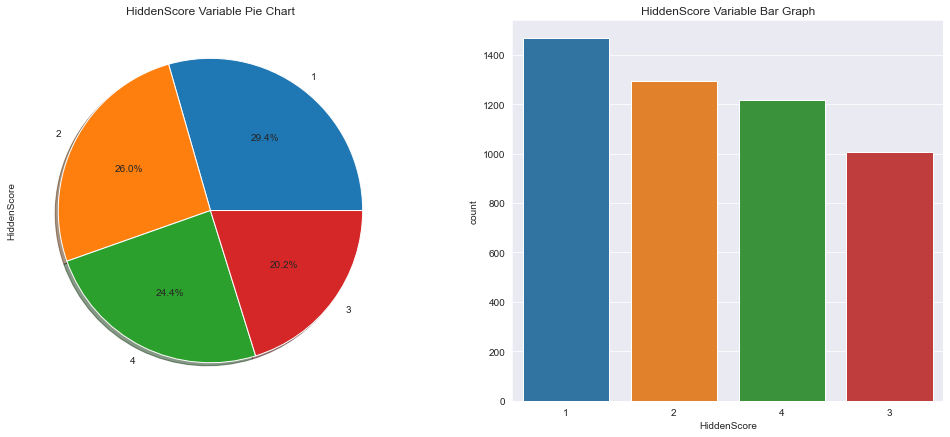

In [27]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('HiddenScore',data=df,ax=axes[1],order=[1,2,4,3])
axes[0].set_title('HiddenScore Variable Pie Chart')
axes[1].set_title('HiddenScore Variable Bar Graph')
plt.show()

**We can see nearly equal distribution of each category**

**Level**

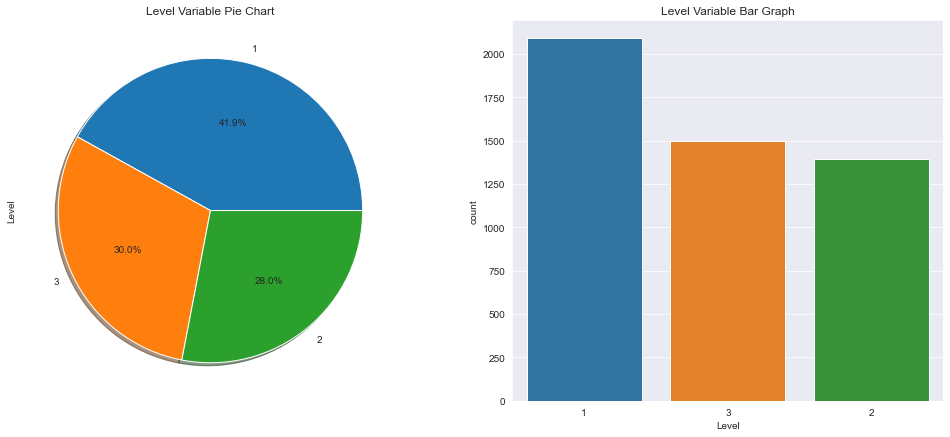

In [28]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Level'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Level',data=df,ax=axes[1],order=[1,3,2])
axes[0].set_title('Level Variable Pie Chart')
axes[1].set_title('Level Variable Bar Graph')
plt.show()

> **Level 2 and 3 has nearly equal distribution**

> **Level 1 customers are more compared to others**

**FDAccount**

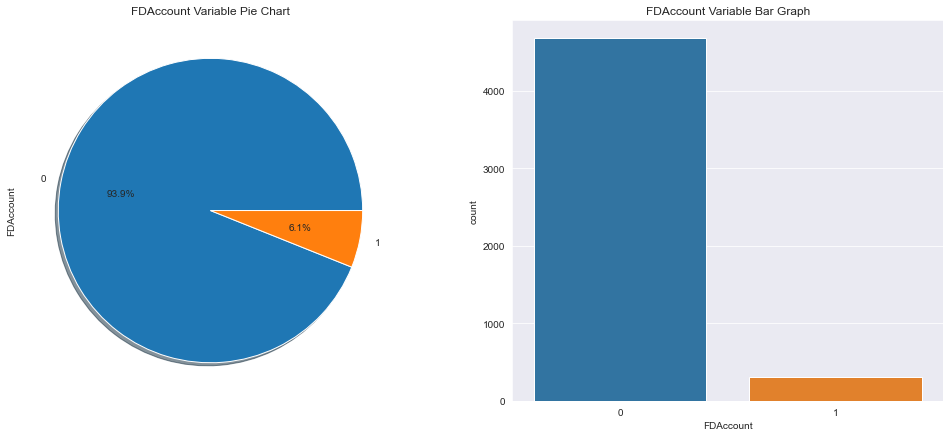

In [29]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['FDAccount'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('FDAccount',data=df,ax=axes[1])
axes[0].set_title('FDAccount Variable Pie Chart')
axes[1].set_title('FDAccount Variable Bar Graph')
plt.show()

> **We can see 93.9% of customers does not have fixed deposit account**

**OnlineBanking**

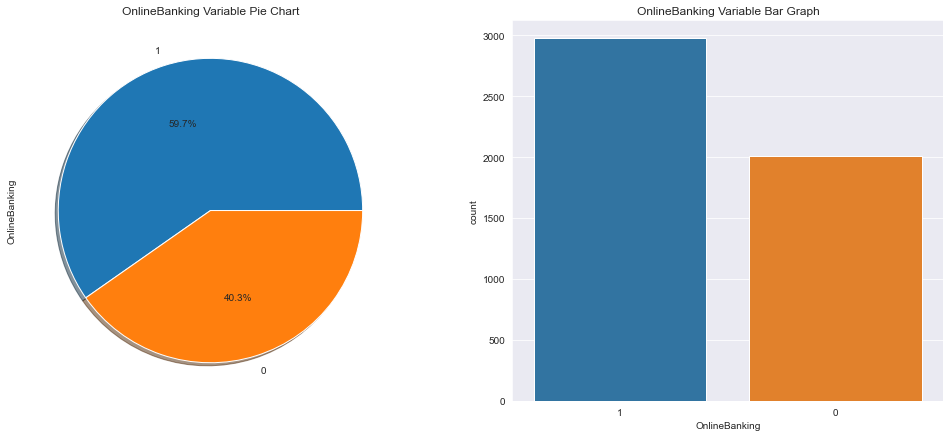

In [30]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['OnlineBanking'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('OnlineBanking',data=df,ax=axes[1],order=[1,0])
axes[0].set_title('OnlineBanking Variable Pie Chart')
axes[1].set_title('OnlineBanking Variable Bar Graph')
plt.show()

> **60 % of people uses internet banking**

**CreditCard**

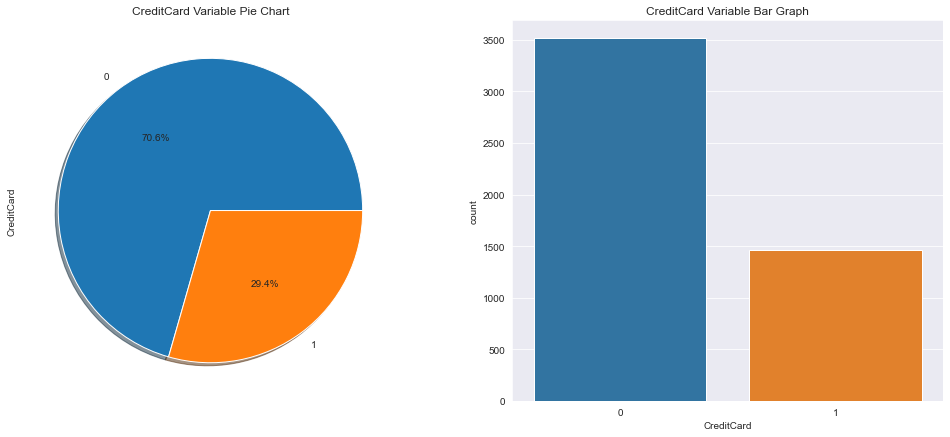

In [31]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('CreditCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('CreditCard Variable Pie Chart')
axes[1].set_title('CreditCard Variable Bar Graph')
plt.show()

> **70 % of people uses bank's credit card**

**LoanOnCard**

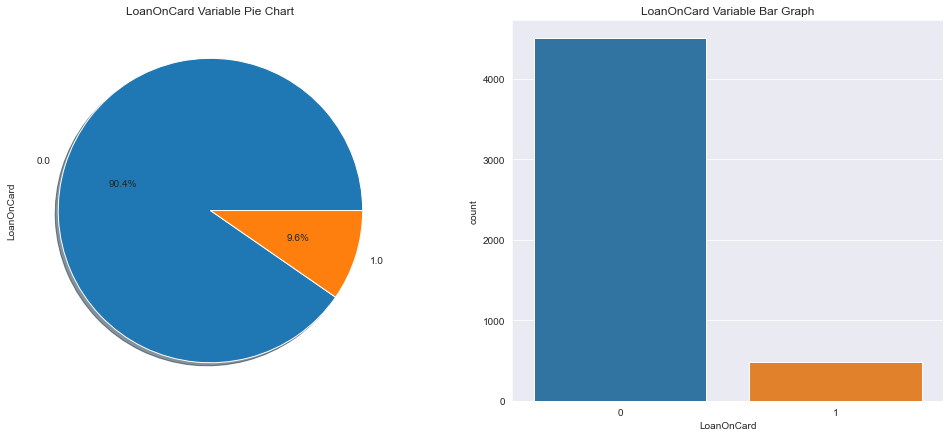

In [32]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

> **We can see 90% of people does not have loan on credit card**

 # **Bi Variate Analysis**

**Numerical vs Category**

**LoanOnCard vs CustomerSince**

In [33]:
df.columns.tolist()

['Age',
 'CustomerSince',
 'MaximumSpend',
 'Pincode',
 'HiddenScore',
 'AverageSpendMonthly',
 'Level',
 'Mortgage',
 'Security',
 'FDAccount',
 'OnlineBanking',
 'CreditCard',
 'LoanOnCard']

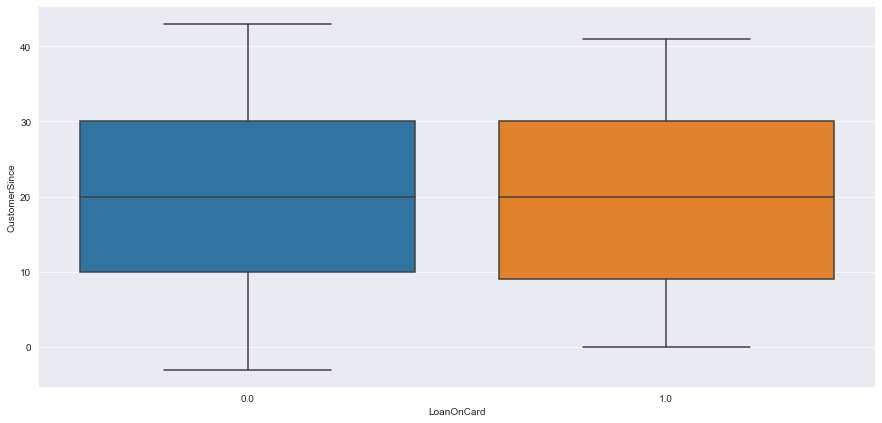

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= df)
plt.show()

> **Customer of the bank since has equal distribution on loan holders and non-loan holders.**

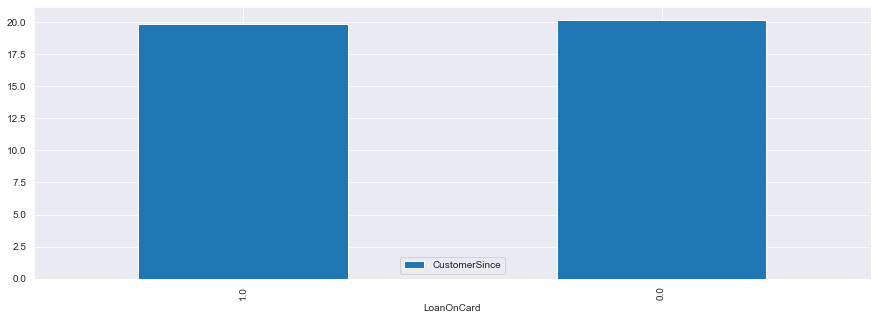

In [35]:
df.groupby(by=['LoanOnCard'])['CustomerSince'].mean().reset_index().sort_values(['CustomerSince']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='CustomerSince',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

> **Mean values are nearly equal for both loan holders and non loan holders**

**MaximumSpend vs LoanOnCard**

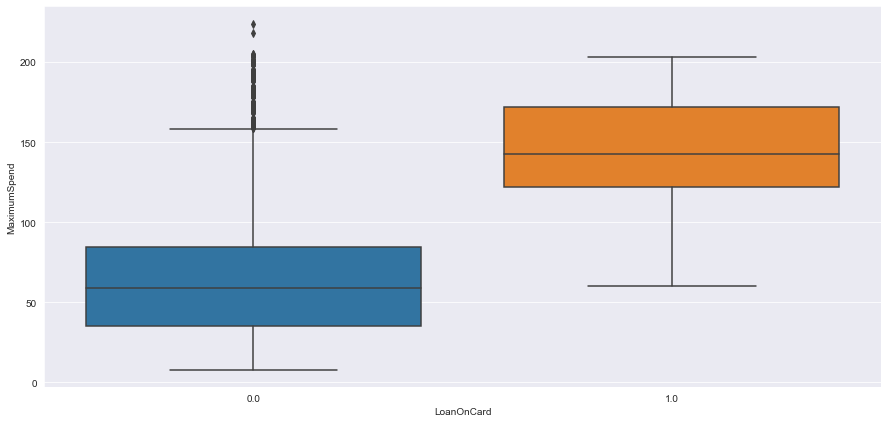

In [36]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='MaximumSpend', data= df)
plt.show()

> **It is evident that people having loan on card spends more than who doesn't have**

>**Some customer who does not have loan also spends more sometimes.**

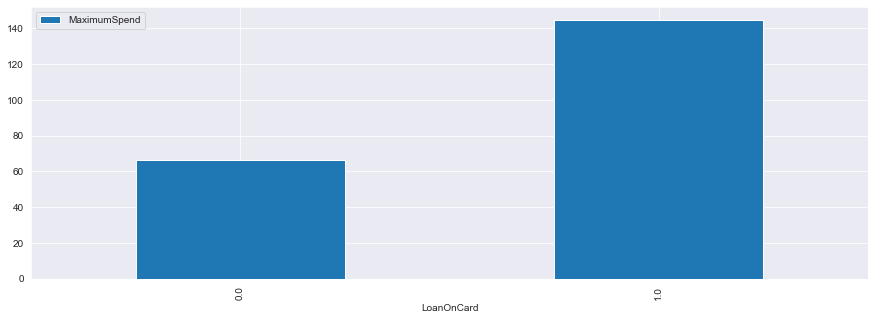

In [37]:
df.groupby(by=['LoanOnCard'])['MaximumSpend'].mean().reset_index().sort_values(['MaximumSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='MaximumSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

> **Mean value of Maximum spend is more for loan holders**

**AverageSpendMonthly vs LoanOnCard**


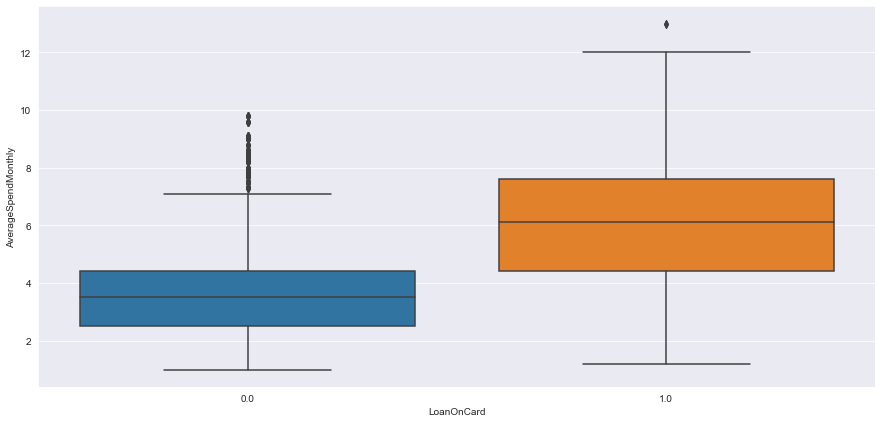

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='AverageSpendMonthly', data= df)
plt.show()

> **Monthly average spend is more for loan holders**

> **This column is directly proportional to highest spend**

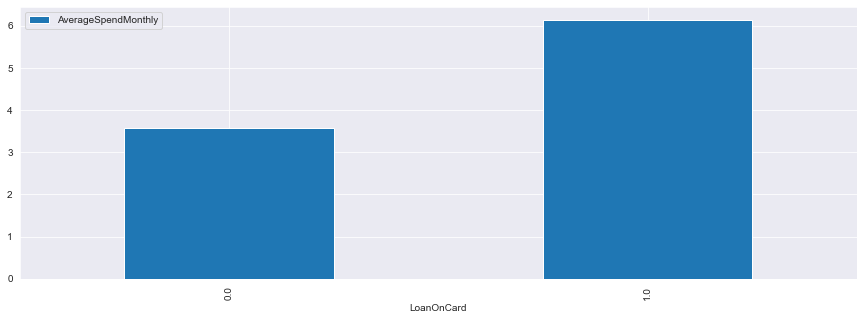

In [39]:
df.groupby(by=['LoanOnCard'])['AverageSpendMonthly'].mean().reset_index().sort_values(['AverageSpendMonthly']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='AverageSpendMonthly',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

> **Average spend mean values are more for loan holders.**

**Mortgage vs LoanOnCard**

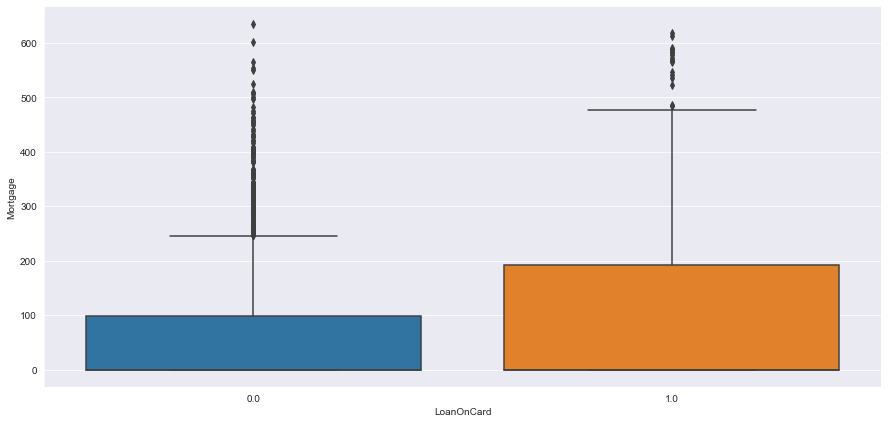

In [40]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= df)
plt.show()

> **Mortage value is high for loan holders**

> **We can see extreme value in both the cases**

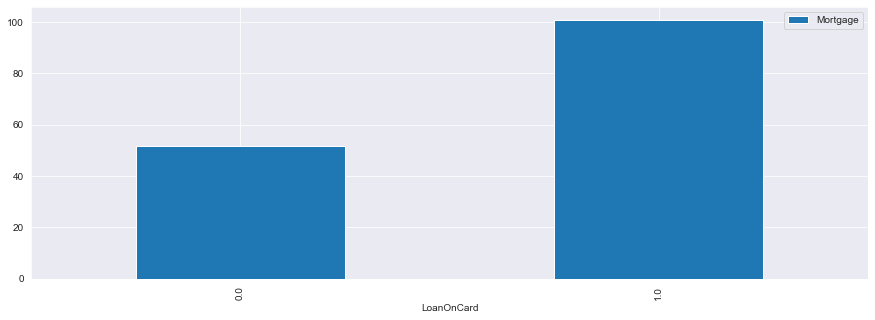

In [41]:
df.groupby(by=['LoanOnCard'])['Mortgage'].mean().reset_index().sort_values(['Mortgage']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Mortgage',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

> **Mortgage Mean values are more for loan holders**

**Age vs LoanOnCard**

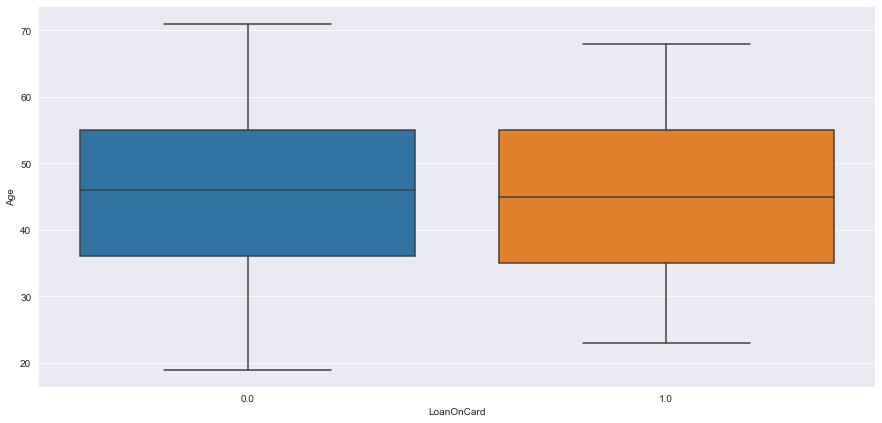

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Age', data= df)
plt.show()

> **Age distribution is nearly equal for both loan holders and non-loan holders**

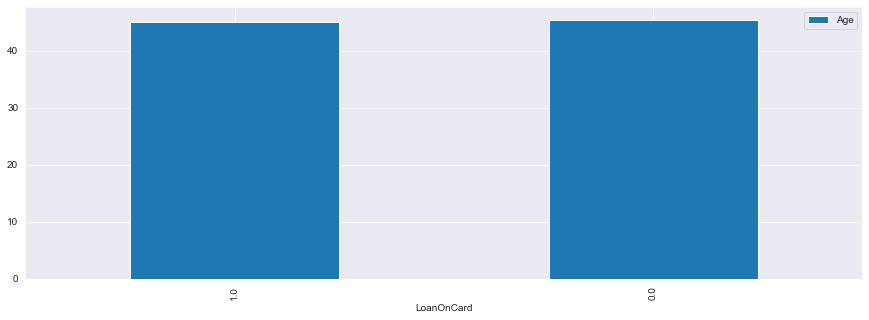

In [43]:
df.groupby(by=['LoanOnCard'])['Age'].mean().reset_index().sort_values(['Age']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Age',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

> **Mean values are nearly equal so age is not affected for taking loans**

**Numerical vs Numerical**

**AverageSpendMonthly vs HighestSpend**

In [44]:
df.columns.tolist()

['Age',
 'CustomerSince',
 'MaximumSpend',
 'Pincode',
 'HiddenScore',
 'AverageSpendMonthly',
 'Level',
 'Mortgage',
 'Security',
 'FDAccount',
 'OnlineBanking',
 'CreditCard',
 'LoanOnCard']

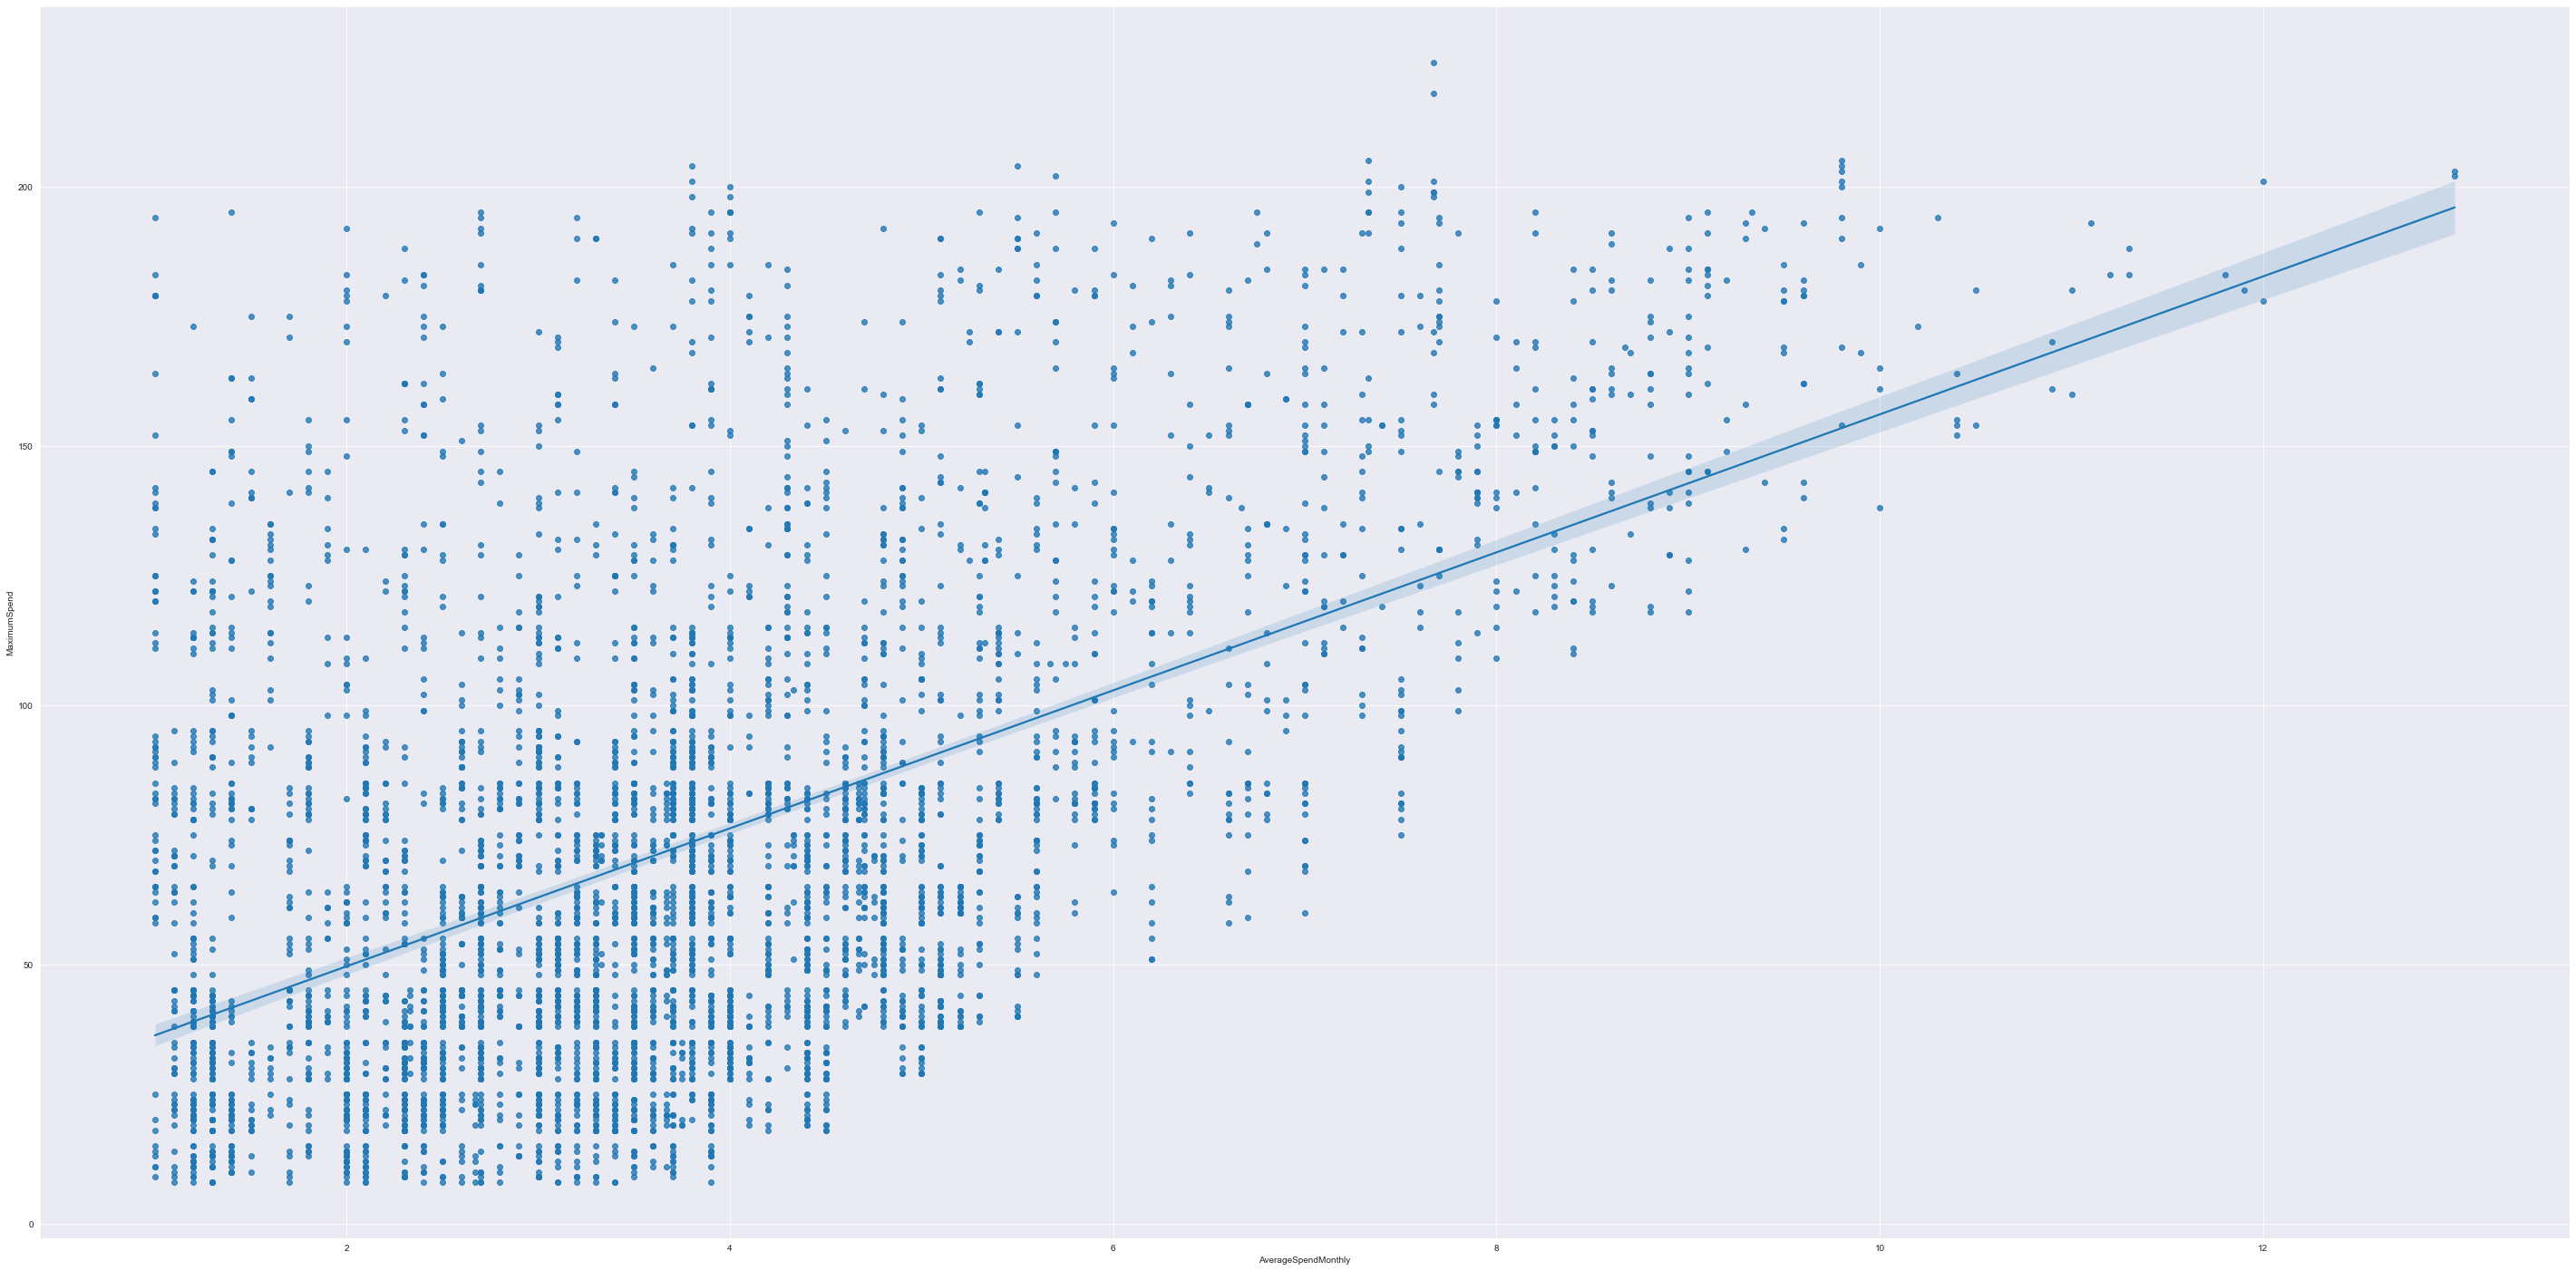

In [45]:
figure = plt.figure(figsize=(50,25))

ax = sns.regplot(x='AverageSpendMonthly',y='MaximumSpend', data=df) # regression plot - scatter plot with a regression line

> **There is clear linear relationship between average Monthly spend and maximum spend.**

**Age vs AverageSpendMonthly**

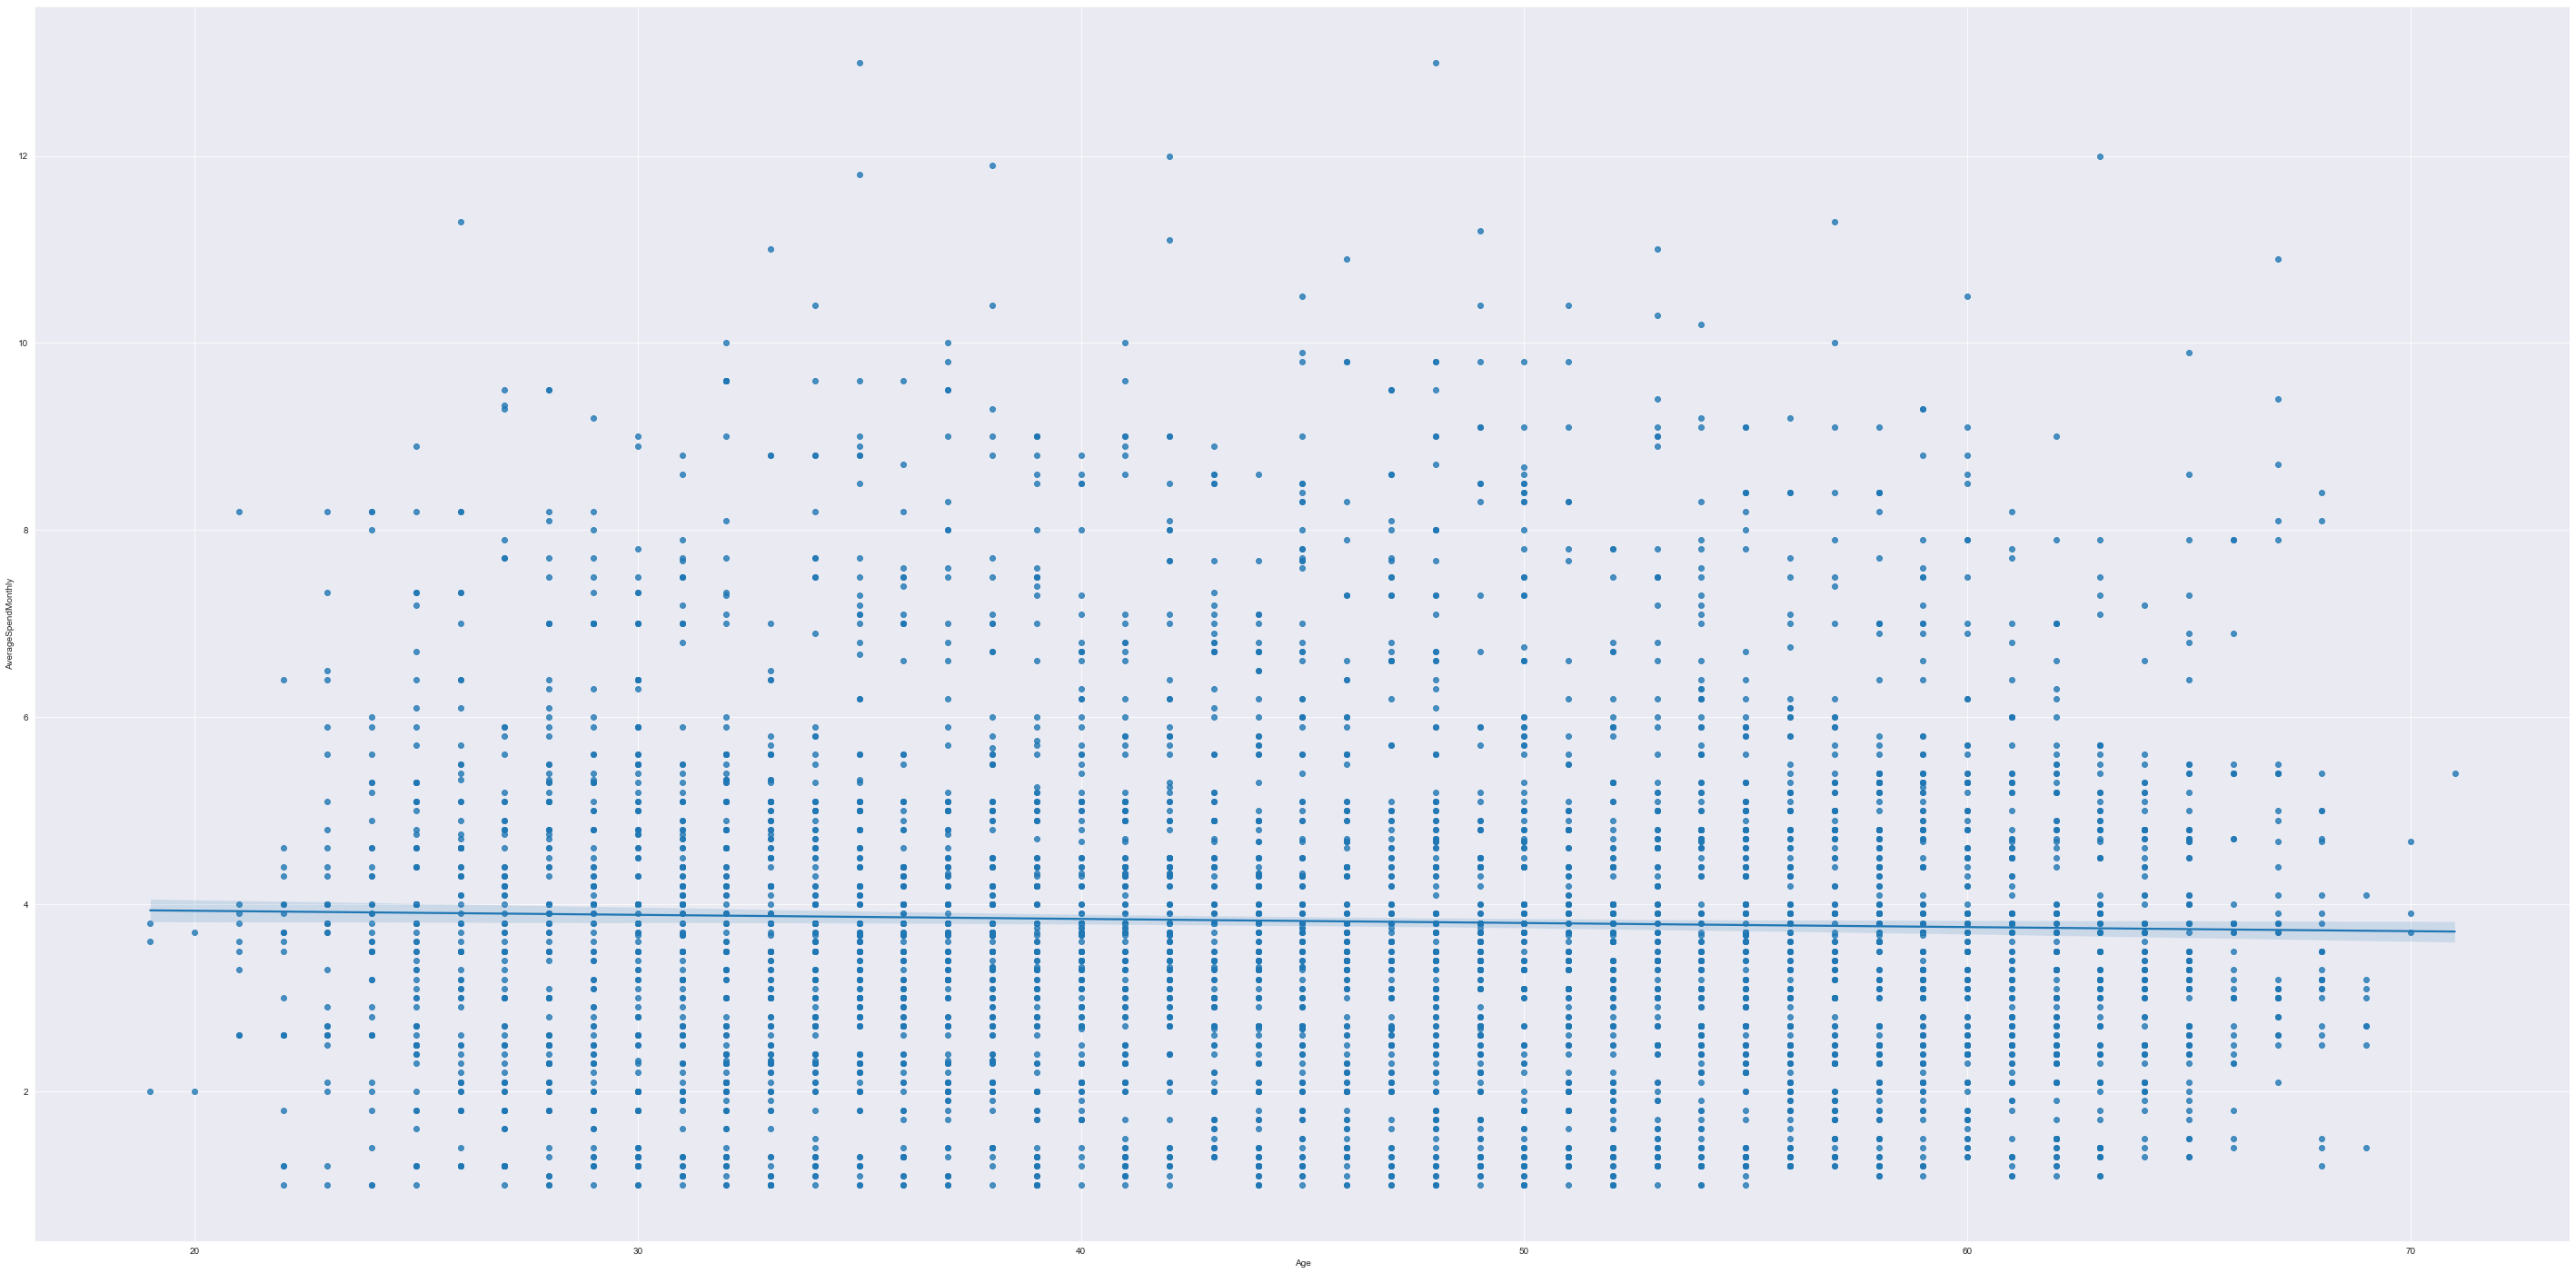

In [46]:
figure = plt.figure(figsize=(50,25))

ax = sns.regplot(x='Age',y='AverageSpendMonthly', data=df) # regression plot - scatter plot with a regression line

> **Age does not have any relationship with spend.**

**CustomerSince vs AverageSpendMonthly**

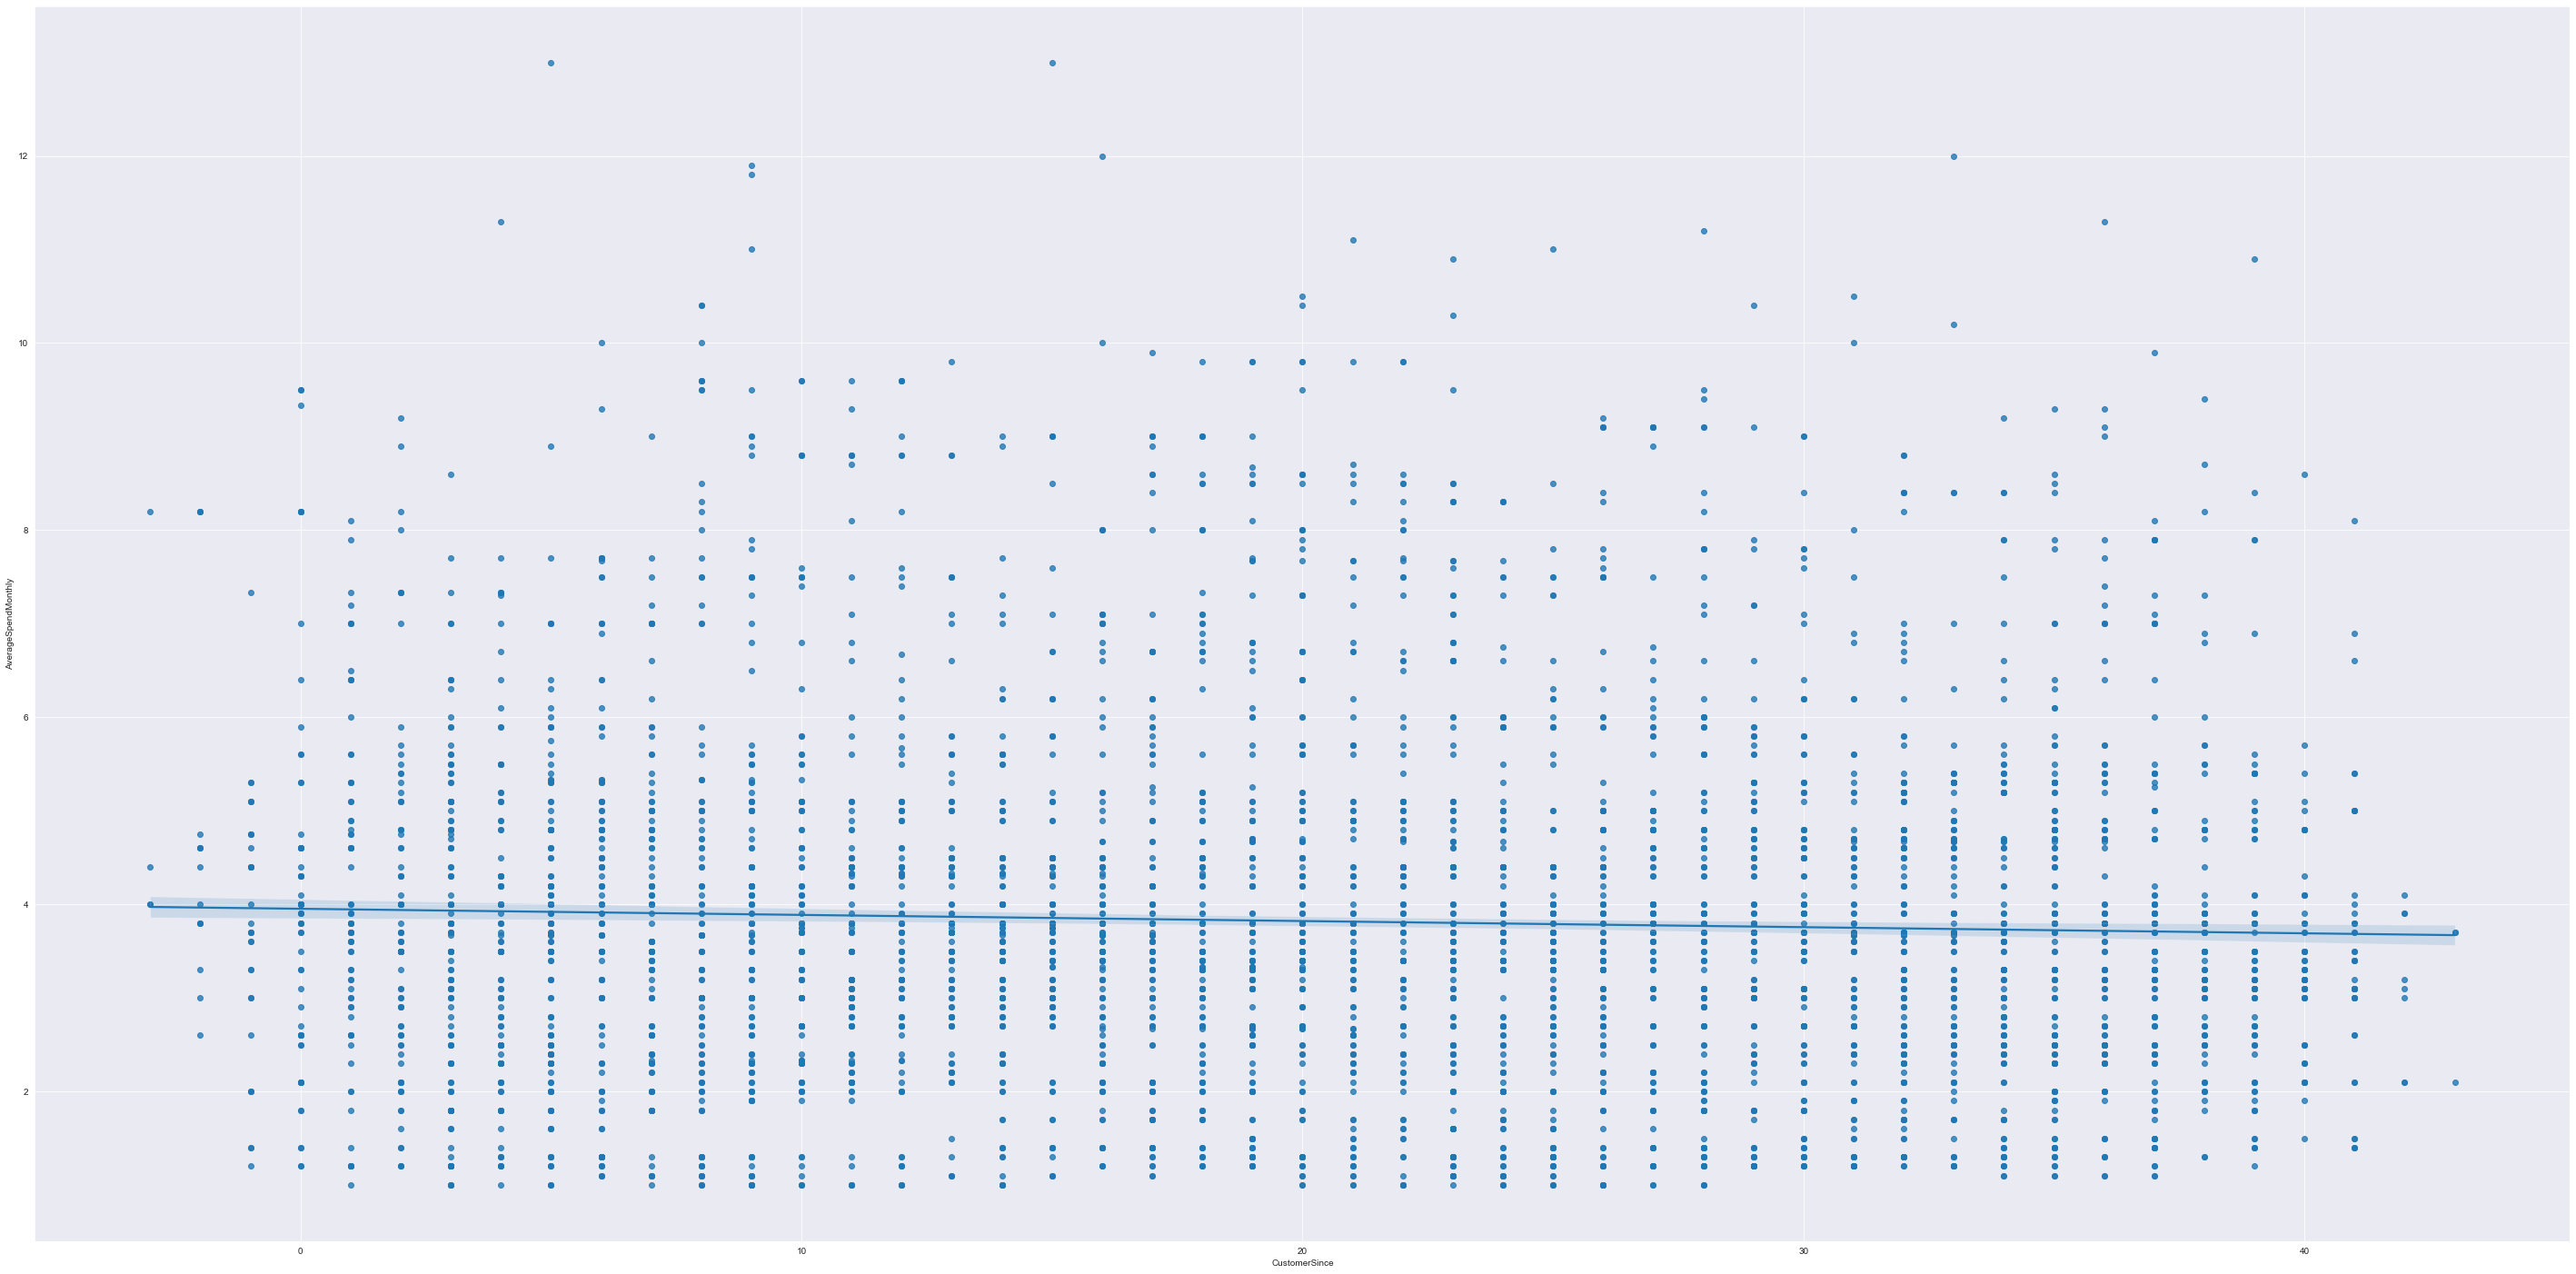

In [47]:
figure = plt.figure(figsize=(50,25))
ax = sns.regplot(x='CustomerSince',y='AverageSpendMonthly', data=df) # regression plot - scatter plot with a regression line

> **Customer period is not dependent on spend**

**Mortgage vs AverageSpendMonthly**

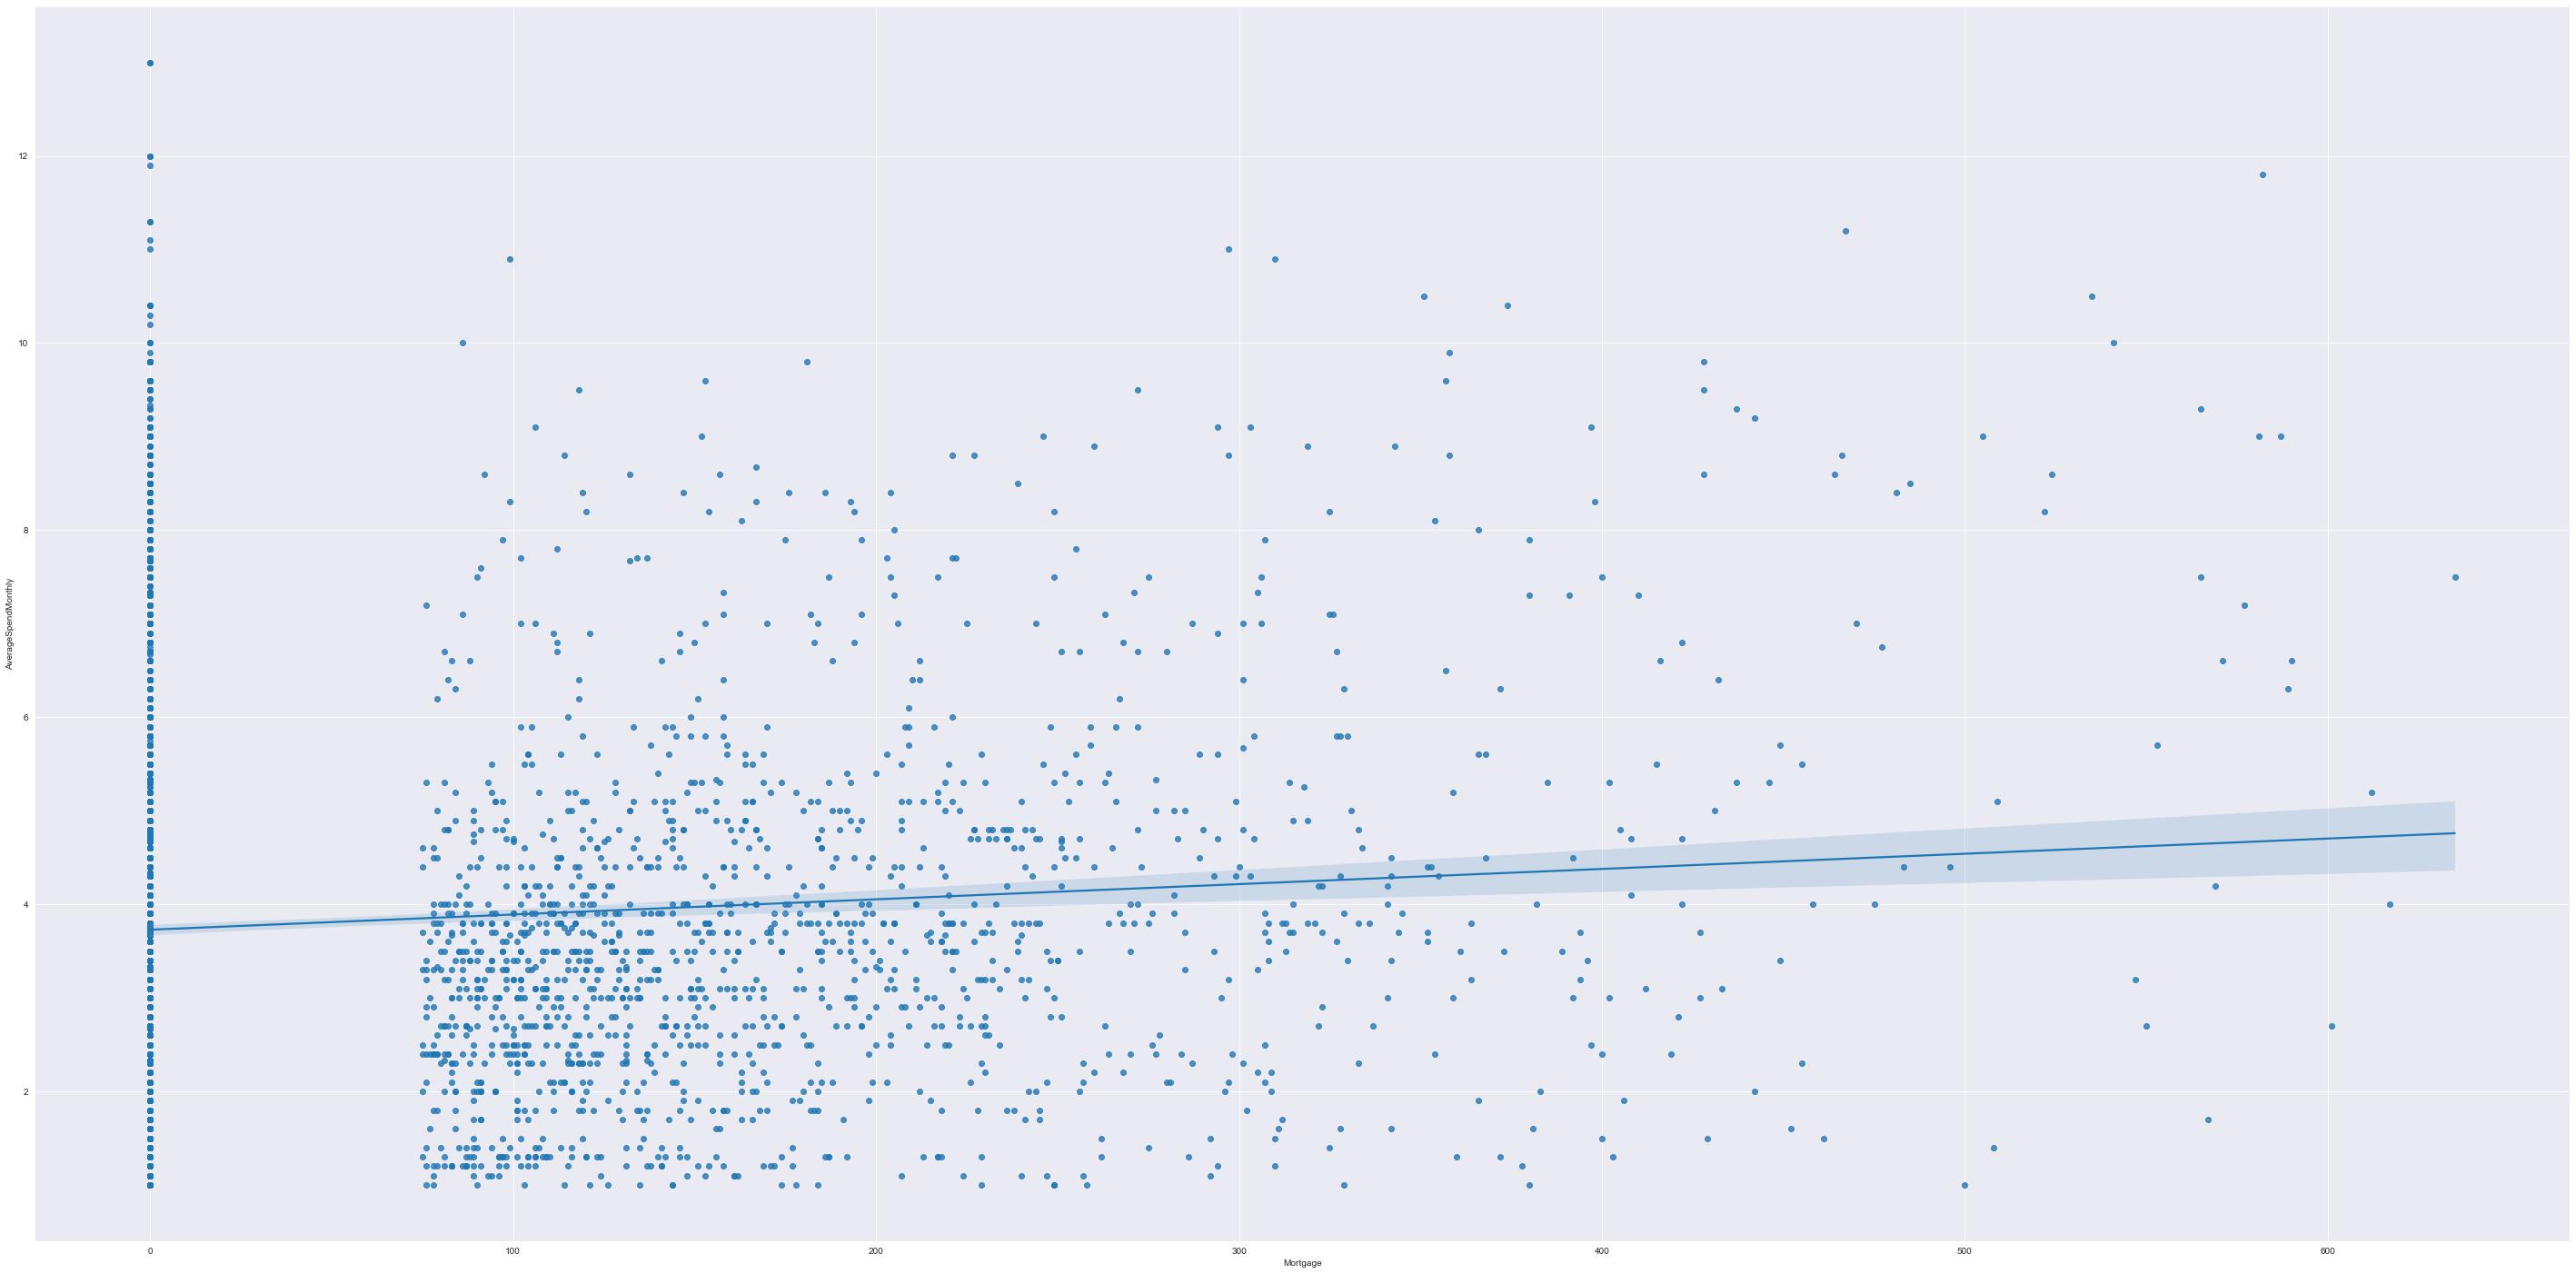

In [48]:
figure = plt.figure(figsize=(50,25))
ax = sns.regplot(x='Mortgage',y='AverageSpendMonthly', data=df) # regression plot - scatter plot with a regression line

**Mortgage value has slight relationship with spend**

**Correlation among pairs of continuous variables**

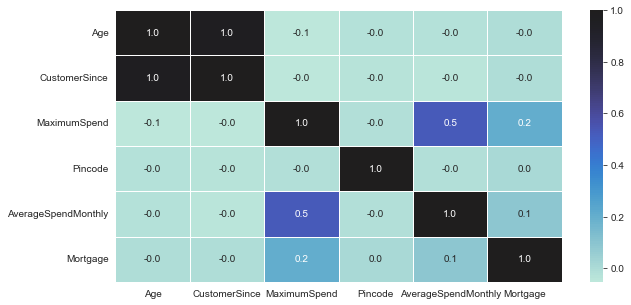

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

> **Age and customer since has correlation as 1. Any one can be used for the model.**

> **Maximum spend has large correlation with monthly average spend**

> **Mortage and highest spend has little correlation**

> **Rest of the variables does not have any relation**

**Category vs Category**

**Hidden Score vs Loan on card**

<AxesSubplot:xlabel='HiddenScore', ylabel='count'>

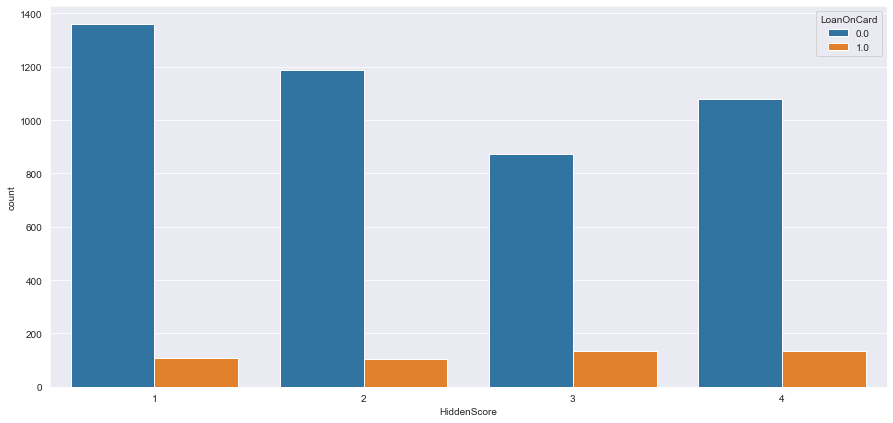

In [50]:
plt.figure(figsize=(15,7))
sns.countplot(df['HiddenScore'],hue=df['LoanOnCard'])

> **Hidden score is more for non-loan holders**

**Level vs Loan on card**

<AxesSubplot:xlabel='Level', ylabel='count'>

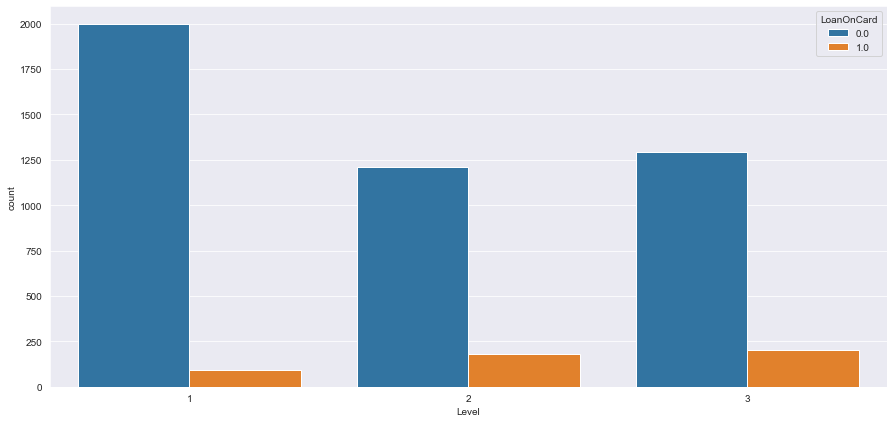

In [51]:
plt.figure(figsize=(15,7))
sns.countplot(df['Level'],hue=df['LoanOnCard'])

> **Level 1 has minimum number of loan holders**

> **Loan holders in Level 2 and 3 are nearly equal**

**Security vs Loan on card**

<AxesSubplot:xlabel='Security', ylabel='count'>

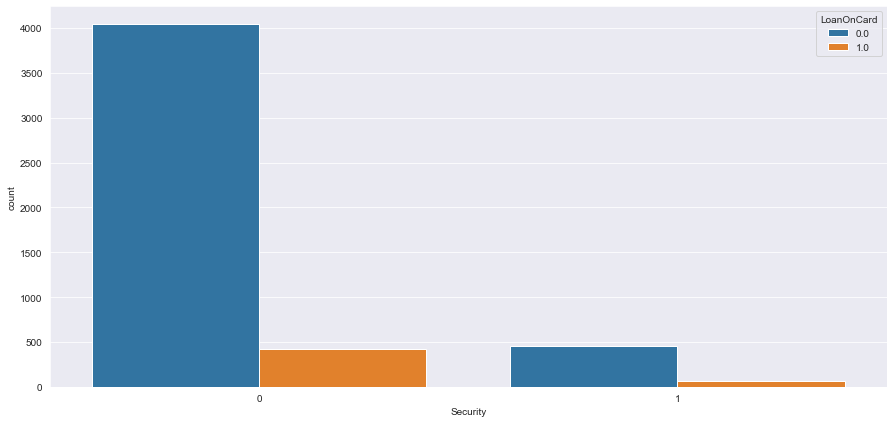

In [52]:
plt.figure(figsize=(15,7))
sns.countplot(df['Security'],hue=df['LoanOnCard'])

> **It is surprisingly to see more customers those who have loan does not have any security**

> **Security of loan holders are very less**

In [53]:
df.columns.tolist()

['Age',
 'CustomerSince',
 'MaximumSpend',
 'Pincode',
 'HiddenScore',
 'AverageSpendMonthly',
 'Level',
 'Mortgage',
 'Security',
 'FDAccount',
 'OnlineBanking',
 'CreditCard',
 'LoanOnCard']

**FDAccount vs  Loanoncard**

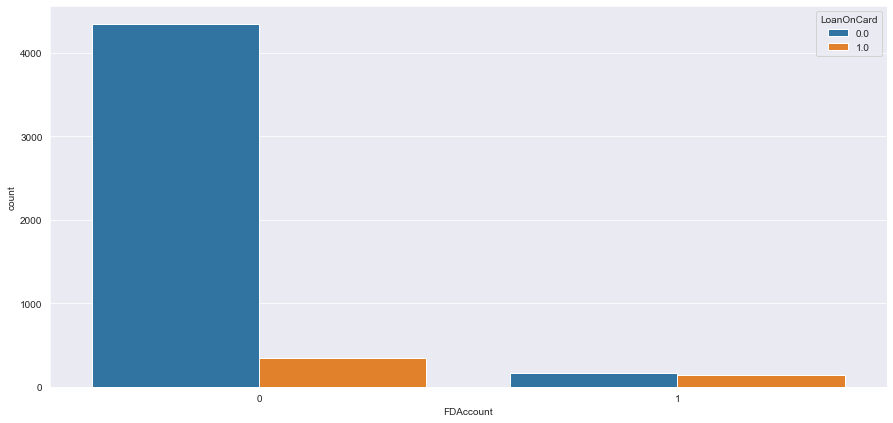

In [54]:
plt.figure(figsize=(15,7))
sns.countplot(df['FDAccount'],hue=df['LoanOnCard'])
plt.show()

> **Count of non loan holders are more**


**We will do point plot to have detailed analysis of categorical variable**

# **MultiVariate Analysis**

**"AverageSpendMonthly" vs "loan" vs "level"**

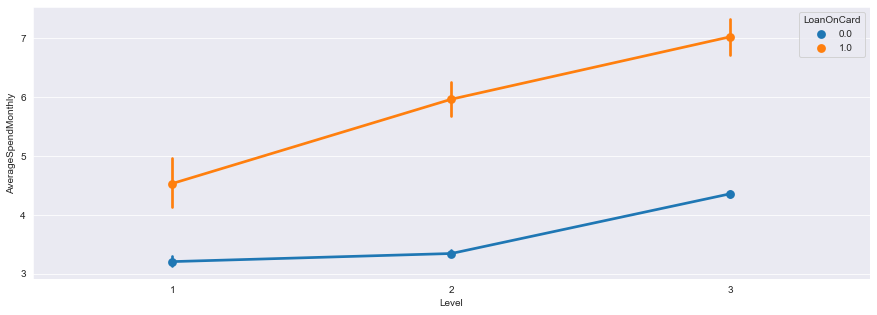

In [55]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Level", y="AverageSpendMonthly", hue = 'LoanOnCard',  data=df)
plt.show()

> **We can clearly see that loan holder spend more money.Particulary the spend is more on level 2 and 3**

**"Average Spend Monthly" vs "Loan" vs "OnlineBanking"**

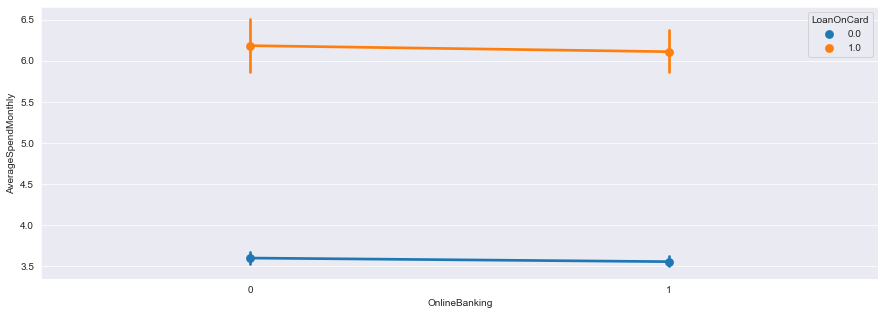

In [56]:
plt.figure(figsize=(15,5))
sns.pointplot(x="OnlineBanking", y="AverageSpendMonthly", hue = 'LoanOnCard',  data=df)
plt.show()

> **There is no fluctuation due to internet banking**

**"OnlineBanking" vs "Loan" vs "CreditCard"**

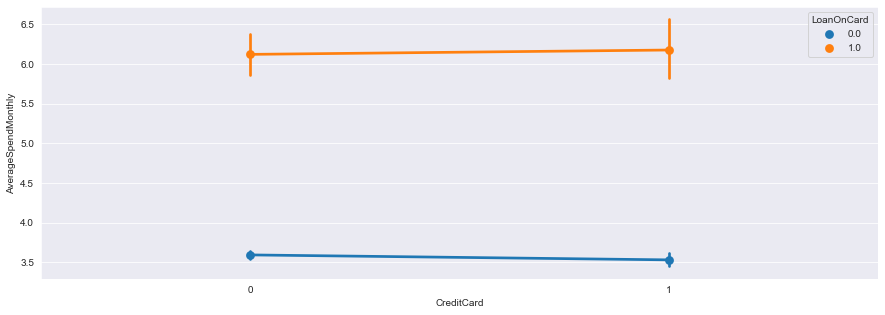

In [57]:
plt.figure(figsize=(15,5))
sns.pointplot(x="CreditCard", y="AverageSpendMonthly", hue = 'LoanOnCard',  data=df)
plt.show()

> **Spend is slightly more for credit card holders**

In [58]:
df.columns.tolist()

['Age',
 'CustomerSince',
 'MaximumSpend',
 'Pincode',
 'HiddenScore',
 'AverageSpendMonthly',
 'Level',
 'Mortgage',
 'Security',
 'FDAccount',
 'OnlineBanking',
 'CreditCard',
 'LoanOnCard']

**"AverageSpendMonthly" vs "Loan" vs "FixedDepositAccount"**

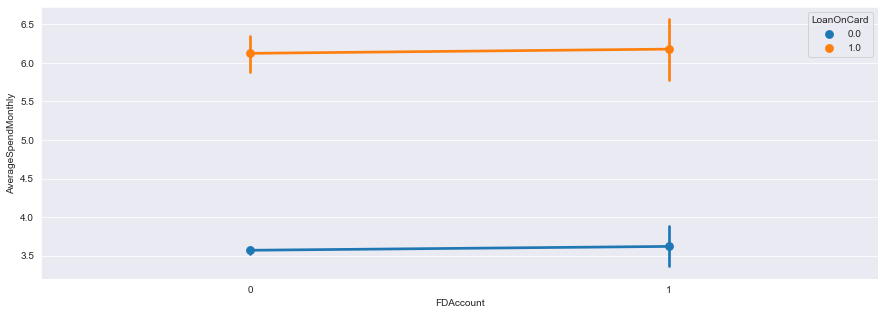

In [59]:
plt.figure(figsize=(15,5))
sns.pointplot(x="FDAccount", y="AverageSpendMonthly", hue = 'LoanOnCard',  data=df)
plt.show()

> **Spend is slightly more for FD Account holders**

# Hypothesis Testing

**We can statistically check whether all the independent variables has significant effect on target variables**

In [60]:
class_summary=df.groupby('LoanOnCard') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

,LoanOnCard,Age,CustomerSince,MaximumSpend,Pincode,AverageSpendMonthly,Mortgage
0,0.0,45.398667,20.146889,66.290444,93152.337111,3.573182,51.869111
1,1.0,45.045833,19.843750,144.745833,93153.202083,6.138688,100.845833


**Highest Spend mean values differ huge for loan and non-loan customer**

**Age mean is equal for each class**

**We can check by statistical test**

**Statistical Testing of continuous feature with target variable**

In [61]:
col=list(df.select_dtypes(include=['int64','float64']).columns)

**Here we will be using two-sample unpaired t-test**

**Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable**

**H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable**

In [62]:
for i in col:
    x = np.array(df[df.LoanOnCard == 0][i]) 
    y = np.array(df[df.LoanOnCard == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))
    print('\n')

 P_Value:0.5406818733979142
 Fail to Reject Null Hypothesis.Age of Loan holders and non-Loan holders are  same


 P_Value:0.5855242526574542
 Fail to Reject Null Hypothesis.CustomerSince of Loan holders and non-Loan holders are  same


 P_Value:1.527529731162187e-227
 Rejecting Null Hypothesis.MaximumSpend of Loan holders and non-Loan holders are not same


 P_Value:0.9920253364424511
 Fail to Reject Null Hypothesis.Pincode of Loan holders and non-Loan holders are  same


 P_Value:1.0595954637667791e-86
 Rejecting Null Hypothesis.AverageSpendMonthly of Loan holders and non-Loan holders are not same


 P_Value:1.3389598194359617e-10
 Rejecting Null Hypothesis.Mortgage of Loan holders and non-Loan holders are not same




**We can see Age,Customer since and zip code does not have effect on target variable. So dropping this column before building model**

In [63]:
df.drop(['Age','CustomerSince','Pincode'],axis=1,inplace=True)

**Statistical Testing of categorical features with target variable**

**Ho: There is no significant difference in hidden score for different category of target variable(Loan on card)**

**H1: There is significant difference in hidden score for different category of target variable(Loan on card)**    

In [64]:
crosstab=pd.crosstab(df['LoanOnCard'],df['HiddenScore'])
print(crosstab)

HiddenScore     1     2    3     4
LoanOnCard                        
0.0          1359  1187  873  1081
1.0           107   106  133   134


**Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in Hiddenscore among Loan on card (0 and 1)?**

In [65]:
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 1.5107064617649127e-06


In [66]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('{} Rejecting Null Hypothesis. \n There is significant difference in hidden score for different category of target variable(Loan on card)'.format('\033[1m'))
else:
    print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in hidden score for different category of target variable(Loan on card)'.format('\033[1m'))

 Rejecting Null Hypothesis. 
 There is significant difference in hidden score for different category of target variable(Loan on card)


**Similarly we will check for other categorical columns**

In [67]:
cat_col=list(df.select_dtypes(include=['category']).columns)

In [68]:
cat_col.remove('HiddenScore')
cat_col.remove('LoanOnCard')

In [69]:
for i in cat_col:
    crosstab=pd.crosstab(df['LoanOnCard'],df[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    print('\n')

 Rejecting Null Hypothesis. 
 There is significant difference in Level Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in Security Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in FDAccount Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in OnlineBanking Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in CreditCard Feature for different category of target variable(Loan on card)




**We can see credit card,internet banking and security does not have significant difference in target variable.So dropping this column before building model**

In [70]:
df.drop(['CreditCard','OnlineBanking','Security'],axis=1,inplace=True)

# 4. Data Pre-processing

# **Outlier Analysis**

**We are imputing outiers with mean**

In [71]:
col=['MaximumSpend','AverageSpendMonthly','Mortgage']

In [72]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in MaximumSpend Before Imputing : 96


 Mean of MaximumSpend is 71


 Total Number of outliers in MaximumSpend After Imputing : 0


 Total Number of outliers in AverageSpendMonthly Before Imputing : 214


 Mean of AverageSpendMonthly is 3


 Total Number of outliers in AverageSpendMonthly After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




> **We have imputed all outliers with mean value**

# **Checking on Target Imbalance**

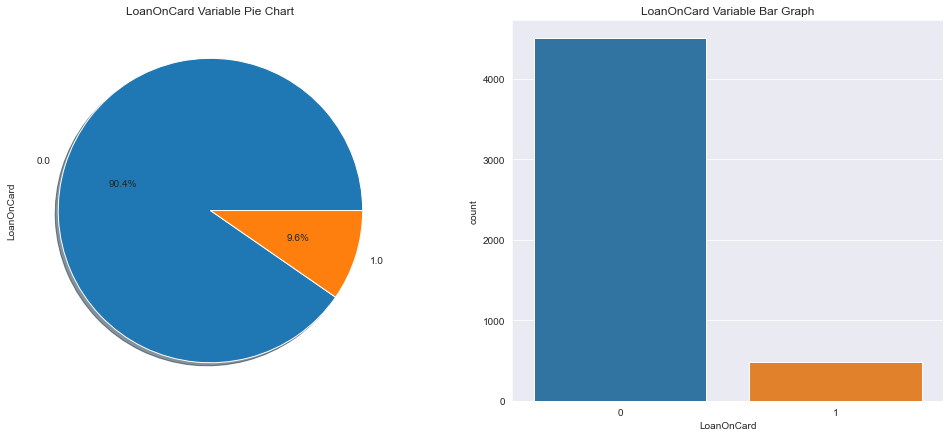

In [73]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

> **There is huge imbalance in target variable.** 

> **If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.**

> **A widely adopted technique for dealing with highly unbalanced datasets is called resampling**

**Two widely used resampling methods:**
    
**Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.**

**Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class**

**Here we will use oversampling because undersampling may remove important information from the dataset**

#  Predictors and Target

In [74]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='LoanOnCard')
y=df['LoanOnCard'] #target

**SMOTE for target imbalance**

**Here we are building model without sampling**

# Train - Test Split

In [75]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# 5. Model training, testing and tuning:

# **Logistic Regression Model**

In [76]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9503729202524384
Accuracy on Test data: 0.9431057563587684


**94% accuracy on training set and 93% accuracy on test set.**

**Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good**

**Confusion Matrix**

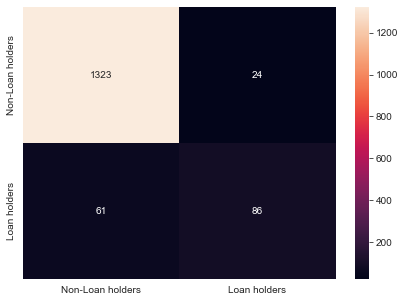

In [77]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

**In the above figure 76 and 26 are the errors in the model.**

**we are getting very less error**

In [78]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1347
         1.0       0.78      0.59      0.67       147

    accuracy                           0.94      1494
   macro avg       0.87      0.78      0.82      1494
weighted avg       0.94      0.94      0.94      1494



**Here you can see model is poor in predicting class 1 compared to class 0**

**Accuracy is good but in this case we need to look on recall value**

**Here Recall tells that only 48% class 1 is predicted correctly from actual values**

**We dont have enough sample of class 1 to train the model.**

**We will do the sampling and check how recall values improves in this case.**

# **SMOTE**

**Here we are doing smote for all  data**

In [79]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

In [80]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [81]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64


**we can see the target is balanced after sampling**

In [82]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.30, random_state=10)

In [83]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8723809523809524
Accuracy on Test data: 0.8748148148148148


**Here both accuracy is reduced after sampling. Let us check on the classification report.**

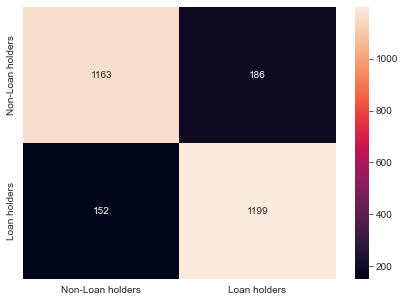

In [84]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [85]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1349
         1.0       0.87      0.89      0.88      1351

    accuracy                           0.87      2700
   macro avg       0.88      0.87      0.87      2700
weighted avg       0.88      0.87      0.87      2700



**Now we can see recall value is improved after sampling.**

**So whenever we have imbalance target we will use sampling method to balance the data.**

**If we do smote on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.**

**we are doing smote only for training data**

In [86]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [87]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42)
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [88]:
logit = LogisticRegression()
logit.fit(x_train_res, y_train_res)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8726333907056799
Accuracy on Test data: 0.856760374832664


**we can see there is decrease in test accuracy.**

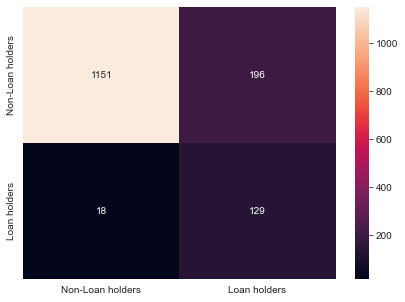

In [89]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [90]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      1347
         1.0       0.40      0.88      0.55       147

    accuracy                           0.86      1494
   macro avg       0.69      0.87      0.73      1494
weighted avg       0.93      0.86      0.88      1494



**After doing sampling only on training data we can see difference in values**

**We are getting good recall value but the precision value is reduced**

**We will do sampling oly on training data to check real performance of the model**

# **Naive Bayes Model**

In [91]:
g_model = GaussianNB()
g_model.fit(x_train_res, y_train_res.ravel())
g_pred = g_model.predict(X_test)

print('Accuracy on Training data:',g_model.score(X_train, y_train) )
print('Accuracy on Test data:',g_model.score(X_test, y_test) )

Accuracy on Training data: 0.8881239242685026
Accuracy on Test data: 0.8661311914323963


**Here accuracy in test data slightly less compared to training data.**

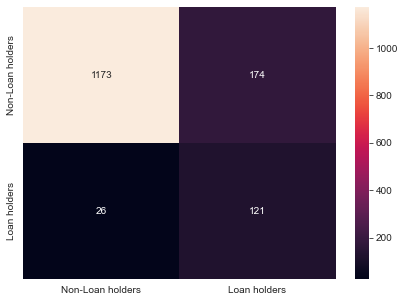

In [92]:
cm = confusion_matrix(y_test, g_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [93]:
print("classification  Matrix:\n",classification_report(y_test,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      1347
         1.0       0.41      0.82      0.55       147

    accuracy                           0.87      1494
   macro avg       0.69      0.85      0.73      1494
weighted avg       0.92      0.87      0.88      1494



**Recall value is good for both the classes**

**Recall value for class 1 is less in naive bayes model compared to logistic regression.**

**K-Fold CV for finding best model**

In [94]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()

LR: 0.947390 (0.008881)
KNN: 0.924297 (0.010397)
NB: 0.909438 (0.010490)


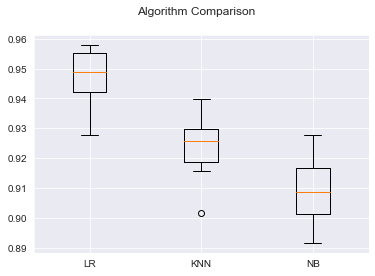

In [95]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Without doing any sampling using k-fold we are getiing good accuracy score in logistic regresssion.**

**Naive bayes performance is less compared to others.**

**As we are having imbalanced data we will use stratified k-fold to check the performance.**

LR: 0.946988 (0.006104)
KNN: 0.924699 (0.007473)
NB: 0.910843 (0.011784)


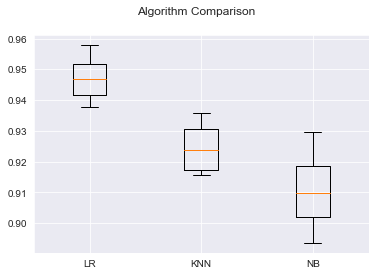

In [96]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Very slight improvement in accuracy**

# **6.Conclusion  and improvisation.**

> **We are selecting final model as logistic regression as it performs well in training and testing test.**

> **Logistic Regression is not affected by overfitting and it is also has good recall value.**

> **Logistic regression performed well in k-fold cross validation as well.**

> **Deviation also less in logistic regression.**

> **Sampling improved to predict minority classes as well**

> **Suggesting to collect data equally for both the classes.**

> **Few customers does't have credit card but those customer having loan on card. This data error can be avoided**
